In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import math
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [20]:
# get_w_star_vector - gets a weight vector (w*) whose Euclidean norm equals 1.
def get_w_star_vector():
    # i. generate each element of w* so that it's distributed standard normal N(0,1)
    standard_norm_rand_vector = np.random.standard_normal(10)
    # ii. normalize w* by |w*| so that it's Euclidean norm (L2) is equal to 1
    euclidean_norm_vector_np = np.linalg.norm(standard_norm_rand_vector)
    normalized_vector = standard_norm_rand_vector / euclidean_norm_vector_np
    return normalized_vector

# generate_random_vectors
# m is the size of the vector produced, and m would represent the # of samples
def generate_random_vectors(m):
    rand_x_vectors = []
    for i in range(m):
        standard_norm_rand_vector = np.random.standard_normal(10)
        rand_x_vectors.append(standard_norm_rand_vector)
    return rand_x_vectors

# generate_X generates X's from x^1 to x^m
def generate_X(m):
    X = generate_random_vectors(m)
    return X

# sigmoid function
def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

# gen_label returns 1 if a random X in uniform dist ( in (0,1)) is less than
# or equal to sigmoid of input x. else return 0
def gen_label(x):
    # get a uniform value between 0 and 1
    rand_uniform_X = np.random.uniform(0, 1, 1)
    sigmoid_check_val = sigmoid(x)
    if rand_uniform_X <= sigmoid_check_val:
        return 1
    else:
        return 0

# generate_y_vector generates a y vector based on a x vector by
# calling gen_label for each x^i value.
def generate_y_vector(X_param, w_star_param):
    y_vector = []

    X_np = np.array(X_param)
    w_star_np = np.array(w_star_param)
    w_star_np_T = w_star_np.T

    w_star_X = X_np.dot(w_star_np_T[:, None])

    for i in range(w_star_X.shape[0]):
        x_i = w_star_X[i]
        y = gen_label(x_i)
        y_vector.append(y)
    return y_vector

# generate_y generates y's from y^1 to y^m
# uses the the following function to generate binary values at random
# GenLabel (x^i) = { 1 - X <= sigma (w^*T x^i) , X ~ UNIFORM (0,1)
#                  { 0 otherwise
def generate_y(X, w_star):
    y = generate_y_vector(X, w_star)
    return y

def generate_data(m):
    # returns the true w as well as X, Y data
    weight_vector = []
    weight_vector = get_w_star_vector()

    X = np.array(generate_X(m))
    y = np.array(generate_y(X, weight_vector))

    return weight_vector, X, y

m = 50
weight_vector, X, y = generate_data(m)

print("w_star: ", weight_vector)
print("X: ", X)
print("y: ", y)

w_star:  [-0.35267002  0.40162094  0.6065412  -0.00245468  0.4828995   0.17742077
 -0.16159724 -0.13142696 -0.01228984  0.19549529]
X:  [[-2.52374367e+00 -1.27949107e+00  7.60122525e-01  1.00916126e+00
  -3.86284422e-01  3.33018318e-01 -7.99647772e-01  1.31631682e-01
  -1.76533457e-01 -1.41934100e+00]
 [ 3.75806526e-01  4.40150269e-01  5.58463588e-01 -2.04726549e-01
   1.22374743e+00 -6.81931560e-01 -5.23743605e-01 -1.78365985e+00
  -1.08196060e-01  5.81712706e-01]
 [-8.36454825e-01 -6.08195909e-01 -1.33355406e-01 -9.55831011e-01
  -3.68572608e-01 -1.47736009e-01  6.99198727e-01 -6.56944863e-01
  -2.02658825e+00  1.68802816e-01]
 [-1.12041363e+00 -5.00009997e-01 -1.54845620e+00  8.01508462e-01
  -3.75966885e-01  9.27855770e-01 -1.08483813e+00  5.02293069e-01
  -9.21967136e-02  1.46298373e-01]
 [ 1.06981250e+00  8.39673985e-01 -1.98562376e-01 -6.03592517e-01
  -2.49253660e-02  6.66236815e-02 -1.42779415e+00  5.21615110e-01
  -4.21465015e-01  5.92849795e-01]
 [-8.72022742e-01  9.87575161

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [21]:
    lr_clf: LogisticRegression = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)
    print("LR Coef ", lr_clf.coef_)  # returns weights (coefficients)
    print("Intercept ", lr_clf.intercept_)  # returns intercepts

LR Coef  [[-0.36094276  0.98021383  0.84332625 -0.37307801  0.87295813 -0.27818831
   0.42843547 -0.51103838  0.28501404 -0.04590906]]
Intercept  [-0.90242885]


## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [22]:
class GradientDescentClassifier:

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1.0 - self.sigmoid(x))

    def calc_input_weights(self, inputs, weights):
        return self.sigmoid(np.dot(inputs, weights))
    
    def __init__(self, step_size=0.01, steps=10):
        self.w_prime_vector = None
        self.learning_results = None
        self.step_size = step_size
        self.num_steps = steps

    # fits a model using gradient descent
    def fit(self, X, y):
        # get the number of samples and number of features from the input training data features
        num_samples, num_features = X.shape
        weights = np.zeros(num_features)
        for _ in range(self.num_steps):
            # calculate weights against current features X
            output = self.calc_input_weights(X, weights)
            # calculate the error (difference between desired output (y) and predicted)
            error_loss = y - output
            # multiply error by X and gradient of sigmoid.
            adjustment = np.dot(X.T, error_loss * self.sigmoid_derivative(output))
            # adjust weights
            weights += (1 / num_samples) * self.step_size * adjustment
        self.w_prime_vector = weights
        return self

    # fits a model using SGD
    def fit_sgd(self, X, y, random_state=0):
        num_samples, num_features = X.shape
        weights = np.zeros(num_features)

        # Initializing the random number generator
        seed = None if random_state is None else int(random_state)
        rng = np.random.default_rng(seed=seed)

        for i in range(self.num_steps):
            # shuffle x and y
            rng.shuffle(X)
            rng.shuffle(y)
            # calculate weights against current features X
            output = self.calc_input_weights(X, weights)
            # calculate the error (difference between desired output (y) and predicted)
            error_loss = y - output
            # multiply error by X and gradient of sigmoid.
            adjustment = np.dot(X.T, error_loss * self.sigmoid_derivative(output))
            # adjust weights
            weights += (1 / num_samples) * self.step_size * adjustment

        self.w_prime_vector = weights
        return self

    def get_w_prime(self):
        return self.w_prime_vector

# algo #2 - gradient descent classifier
gd_clf = GradientDescentClassifier(steps=1000, step_size=0.01).fit(X, y)
w_prime_gd = gd_clf.get_w_prime()
print("Gradient Descent W' vector ", w_prime_gd)

# algo #3 stochastic gradient descent classifier
sgd_clf = GradientDescentClassifier(steps=1000, step_size=0.01).fit_sgd(X, y)
print("Stochastic Gradient Descent W' vector: ", sgd_clf.get_w_prime())

Gradient Descent W' vector  [-0.18612147  0.17454952  0.21073308 -0.09142408  0.22687008 -0.11241018
  0.11792117 -0.13157732  0.10678818 -0.06466723]
Stochastic Gradient Descent W' vector:  [-0.0446964  -0.05933969 -0.02555553 -0.00068454 -0.00052719  0.0097337
  0.00929667 -0.00140612  0.04505165  0.00372675]


## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

average_lr_error_rate_per_m  [1.0570549059445116, 0.7733554197328164, 0.5852172267326188, 0.433560259467629, 0.473600972695548]
Total Time Logistic Regression:  0.14613652229309082
Total Time Gradient Descent:  1.874532699584961
Total Time SGD:  16.426692247390747


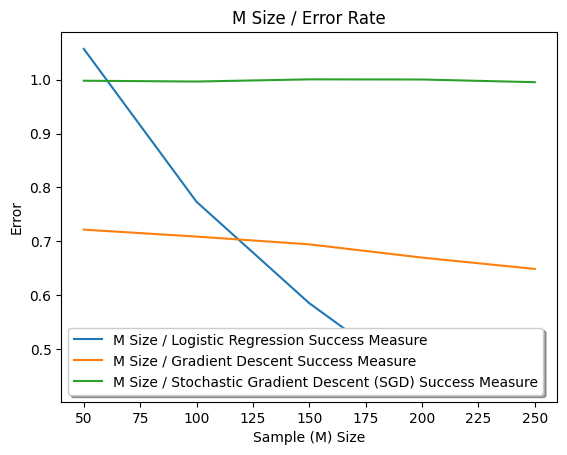

In [24]:
import time

# compare the accuracy of w with w' / w^ with each sample size. 
# use for different sizes of m
# run this several times - 10 times
# then records the time taken to run it on average

# measures the error and the time taken per algorithm
def measure_error_all_classifiers(m):
    weight_vector, X, y = generate_data(m)
    
    # sklearn Logistic Regression
    start_lr = time.time()
    lr_clf: LogisticRegression = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)
    end_lr = time.time()
    lr_time_taken = end_lr - start_lr
    w_prime_lr = lr_clf.coef_
    
    # gradient descent
    start_gd = time.time()
    gd_clf = GradientDescentClassifier(steps=1000, step_size=0.01).fit(X, y)
    w_prime_gd = gd_clf.get_w_prime()
    end_gd = time.time()
    gd_time_taken = end_gd - start_gd

    # stochastic gradient descent
    start_sgd = time.time()
    sgd_clf = GradientDescentClassifier(steps=1000, step_size=0.01).fit_sgd(X, y)
    w_prime_sgd = sgd_clf.get_w_prime()
    end_sgd = time.time()
    sgd_time_taken = end_sgd - start_sgd
    
    error_lr_clf = np.linalg.norm(weight_vector - w_prime_lr)
    error_lr_gd = np.linalg.norm(weight_vector - w_prime_gd)
    error_lr_sgd = np.linalg.norm(weight_vector - w_prime_sgd)
    
    return error_lr_clf, error_lr_gd, error_lr_sgd, lr_time_taken, gd_time_taken, sgd_time_taken

def run_all_m_samples(num_iterations):
    total_time_taken_lr = 0
    total_time_taken_gd = 0
    total_time_taken_sgd = 0
    
    list_of_m = [50, 100, 150, 200, 250]
    
    average_lr_error_rate_per_m = []
    average_gd_error_rate_per_m = []
    average_sgd_error_rate_per_m = []
        
    for m in list_of_m:
        total_error_rate_lr = 0.0
        total_error_rate_gd = 0.0
        total_error_rate_sgd = 0.0
        for _ in range(num_iterations):
            error_lr_clf, error_lr_gd, error_lr_sgd, lr_time_taken, gd_time_taken, sgd_time_taken = measure_error_all_classifiers(m)        
            total_time_taken_lr += lr_time_taken
            total_time_taken_gd += gd_time_taken
            total_time_taken_sgd += sgd_time_taken
            
            total_error_rate_lr += error_lr_clf
            total_error_rate_gd += error_lr_gd
            total_error_rate_sgd += error_lr_sgd
        
        average_lr_error_rate_per_m.append(total_error_rate_lr / num_iterations)
        average_gd_error_rate_per_m.append(total_error_rate_gd / num_iterations)
        average_sgd_error_rate_per_m.append(total_error_rate_sgd / num_iterations)
    
    print("average_lr_error_rate_per_m ", average_lr_error_rate_per_m)
    
    return list_of_m, average_lr_error_rate_per_m, average_gd_error_rate_per_m, average_sgd_error_rate_per_m, total_time_taken_lr, total_time_taken_gd, total_time_taken_sgd
        

list_of_m, lr_avg_e, gd_avg_e, sgd_avg_e, time_lr, time_gd, time_sgd = run_all_m_samples(10)

print("Total Time Logistic Regression: ", time_lr)
print("Total Time Gradient Descent: ", time_gd)
print("Total Time SGD: ", time_sgd)

plt.plot(list_of_m, lr_avg_e, label="M Size / Logistic Regression Success Measure")
plt.plot(list_of_m, gd_avg_e, label="M Size / Gradient Descent Success Measure")
plt.plot(list_of_m, sgd_avg_e, label="M Size / Stochastic Gradient Descent (SGD) Success Measure")

plt.title("M Size / Error Rate")
plt.xlabel("Sample (M) Size")
plt.ylabel("Error")

plt.legend(loc="best", shadow=True)


# Problem 2

In [25]:
from sklearn import datasets, tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

In [26]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

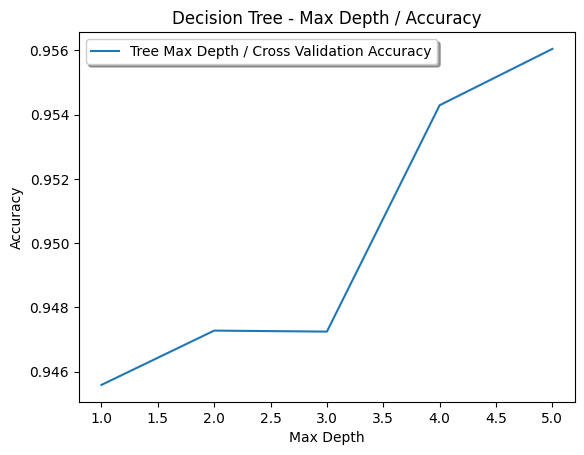

In [27]:
# For each depth in 1,…,5, instantiate an AdaBoost classifier with the base learner
# set to be a decision tree of that depth (set n_estimators=10 and learning_rate=1),
# and then record the 10-fold cross-validated error on the entire breast cancer data set.
# Plot the resulting curve of accuracy against base classifier depth.
# Use 101 as your random state for both the base learner as well as the AdaBoost classifier every time.

RANDOM_STATE = 101
FOLDS = 10

X, y = cancer.data, cancer.target

depth_x_axis = []
cross_val_acc_score_means = []
for i in range(5):
    max_depth_cv = i + 1
    dt_clf_model = tree.DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=max_depth_cv).fit(X, y)
    ada_clf = AdaBoostClassifier(estimator=dt_clf_model, n_estimators=10,
                                 learning_rate=1).fit(X, y)
    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(ada_clf, X, y, cv=kf)
    cross_val_scores_mean = scores.mean()
    depth_x_axis.append(max_depth_cv)
    cross_val_acc_score_means.append(cross_val_scores_mean)

plt.plot(depth_x_axis, cross_val_acc_score_means, label="Tree Max Depth / Cross Validation Accuracy")

plt.title("Decision Tree - Max Depth / Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

plt.legend(loc="best", shadow=True)

# note: may need to wait a little bit when running this part - wait 10-20 seconds if running it.